# Introduction to Julia, part 1

## Types of programming languages

* **Compiler languages**: C/C++, Fortran, ...
  - Directly compiled to machine code that is executed by CPU
  - Pros: fast, memory efficient
  - Cons: longer development time, hard to debug

* **Interpreter languages**: R, MATLAB, Python, SAS IML, Javascript, ...
  - Interpreted by an interpreter
  - Pros: fast prototyping, scripting (Linux shell scripts, Perl)
  - Cons: excruciatingly slow for loops
  - Usually equipped with *REPL* (Read-Eval-Print Loop) or *shell*
  
* Mixed (dynamic) languages: Java, Kotlin, Scala
  - Complied into *byte code* by the compiler, byte code is interpreted by the *virtual machine* (JVM). This scheme achieves architecture independence.
  - More and more languages are adopting JIT technology: R (version 3.4+), MATLAB (R2015b+), Python (PyPy), Julia, ...
      + functions will be compiled before execution on the first or second use. For subsequent uses (e.g., calling the function within a loop), the speedup is significant.
 
* Distinction between compiler and interpreter languages is getting blurred due to improved computation capabilities of the modern hardware and advanced compiler techniques.

* Database languages: SQL, Hive (Hadoop).
  - Data analysis *never* happens if we do not know how to retrieve data from databases

## Take-home messages

* To be versatile in the big data era, familiarize yourself with at least one language in each category.

* To improve efficiency of interpreted languages such as R or Matlab, conventional wisdom is to avoid loops as much as possible, a.k.a., **vectorize** code
> The only loop you are allowed to have is that for an iterative algorithm.

* When looping is unavoidable, need to code in C, C++, or Fortran.
Success stories: the popular `glmnet` package in R is coded in Fortran; `tidyverse` packages use a lot Rcpp/C++.

* Modern languages such as Julia tries to solve the **two language problems**:
  - Prototype code goes into a high-level language
  - Production code goes into a low-level language

## What's Julia?

> Julia is a high-level, high performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments.

* History:
  - Project started in 2009. First public release in 2012 
  - Creators: Jeff Bezanson, Alan Edelman, Stefan Karpinski, Viral Shah
  - First major release v1.0 was released on Aug 8, 2018
  - Long-term support release: v1.0.5, Sept. 2019
  - Current stable release: v1.6.2
  
* Aim to solve two notorious **two language problem**: Prototype code goes into a high-level language like R/Python, production code goes into a low-level languages like C/C++.

    Julia aims to:
> Walks like Python. Runs like C.

See <https://julialang.org/benchmarks/> for the details of benchmark.

* Write high-level, abstract code that closely resembles mathematical formulas
  - yet produces fast, low-level machine code that has traditionally only been generated by static languages.
  
* Julia is more than just "Fast R" or "Fast Matlab"
  - performance comes from features that work well together.
  - you can't just take the magic dust that makes Julia fast and sprinkle it on your language of choice.

## R is great, but...

* The language encourages operating on the whole object (i.e., vectorized code). However, some tasks (e.g. MCMC) are not easily vectorized.

* Unvectorized R code ('for' and 'while' loops) is slow. (http://adv-r.had.co.nz/Performance.html Section on performance starts with "Why is R slow?") 

* Techniques for large data sets - parallelization, memory mapping, database access, map/reduce -can be used but not easily. R is single threaded and most likely stay that way.

* R functions should obey functional semantics (not modify arguments). Okay until you have very large objects on which small changes are made during parameter estimation.

* Sort-of object oriented using generic functions but implementation is casual. Does garbage collection but not based on reference counting.

* The real work is done in underlying C code and it is not easy to trace your way through it.

(by [Doug Bates](http://pages.stat.wisc.edu/~bates/), member of the R Core Team, author of `Matrix` and `lme4` packages, in [Julia for R programmers](http://pages.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf))

* Deficiencies in the core language
  - Many fixed with packages (`devtools`, `roxygen2`, `Matrix`)
  - Others harder to fix (R uses an old version of BLAS)
  - Some impossible to fix (clunky syntax, poor design choices)
  
<!--
* Doug Bates' [Julia package for mixed-effects models](https://github.com/dmbates/MixedModels.jl)
    - Getting Doug on board was a big win for statistics with Julia, as he brought a lot of knowledge about the history of R development and design choices
    
    > As some of you may know, I have had a (rather late) mid-life crisis and run off with another language called Julia.   
    >
    > -- <cite>Doug Bates (on the [`knitr` Google Group](https://groups.google.com/forum/#!msg/knitr/F78PBMIamwk/X-d-zUhrdrkJ), 2013)</cite>
-->

## Learning resources

0. [Julia: A Fresh Approach to Numerical Computing](../../readings/BezansonEdelmanKarpinskiShah17Julia.pdf) by Jeff Bezanson, Alan Edelman, Stefan Karpinski, and Viral B. Shah, *SIAM REVIEW* Vol. 59, No. 1, pp. 65–98.

1. [Julia for R Programmers](http://www.stat.wisc.edu/~bates/JuliaForRProgrammers.pdf) by Doug Bates.

2. YouTube: [Intro to Julia](https://www.youtube.com/watch?v=8h8rQyEpiZA&t) (2h28m), by Jane Herriman. 

3. Cheat sheet: [The Fast Track to Julia](https://juliadocs.github.io/Julia-Cheat-Sheet/).  

4. Browse the Julia [documentation](https://docs.julialang.org/en).  

5. For R users, read [Noteworthy Differences From R](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-R-1).  

    For Python users, read [Noteworthy Differences From Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/?highlight=matlab#Noteworthy-differences-from-Python-1).  

    For Matlab users, read [Noteworthy Differences From Matlab](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-MATLAB-1).  


6. The [Learning page](http://julialang.org/learning/) on Julia's website has pointers to many other learning resources.  

## Julia REPL  (Read-Eval-Print Loop)

The `Julia` REPL, or `Julia` shell, has at least five modes.

1. **Default mode** is the Julia prompt `julia>`. *Type backspace in other modes* to return to the default mode.

2. **Help mode** `help?>`. Type `?` to enter help mode. `?search_term` does a fuzzy search for `search_term`.

3. **Shell mode** `shell>`. Type `;` to enter shell mode. 

4. **Package mode** `(@v1.6) pkg>`. Type `]` to enter package mode for managing Julia packages (install, uninstall, update, ...).

5. **Search mode** `(reverse-i-search)`. Press `ctrl+R` to enter search mode.

6. With `RCall.jl` package installed, we can enter the **R mode** by typing `$` (shift+4) at Julia REPL.

Some survival commands in Julia REPL:
1. `quit()` or `Crtl+D`: exit Julia.

2. `Ctrl+C`: interrupt execution.

3. `Ctrl+L`: clear screen.

0. Append `;` (semi-coloin) to suppress displaying output from a command. Same as Matlab.

0. `include("filename.jl")` to source a Julia code file.

## Seek help

* Online help from REPL: `?function_name`

* Google (~~Naver~~).

* Julia documentation: <https://docs.julialang.org/en>.

* Look up source code: `@edit fun(x)`.

* <https://discourse.julialang.org>.

## Some basic Julia code

In [1]:
# an integer, same as int in R
y = 1
typeof(y)

Int64

In [2]:
# a Float64 number, same as double in R
y = 1.0
typeof(y)

Float64

In [3]:
# Greek letters: `\pi<tab>`
π

π = 3.1415926535897...

In [4]:
typeof(π)

Irrational{:π}

In [5]:
# Greek letters: `\theta<tab>`
θ = y + π

4.141592653589793

In [6]:
# `\alpha<tab>\hat<tab>`
α̂ = π

π = 3.1415926535897...

In [7]:
# vector of Float64 0s
x = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
# vector of Int64 0s
x = zeros(Int, 5)

5-element Vector{Int64}:
 0
 0
 0
 0
 0

In [9]:
# matrix of Float64 0s
x = zeros(5, 3)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [10]:
# matrix of Float64 1s
x = ones(5, 3)

5×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [11]:
# define array without initialization
x = Matrix{Float64}(undef, 5, 3)

5×3 Matrix{Float64}:
 2.30074e-314  2.3008e-314   0.0
 0.0           2.30073e-314  2.3008e-314
 2.3008e-314   0.0           2.30426e-314
 2.30073e-314  2.3008e-314   0.0
 0.0           2.30245e-314  2.3008e-314

In [12]:
# fill a matrix by 0s
fill!(x, 0)

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [13]:
x

5×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [14]:
# initialize an array to be constant 2.5
fill(2.5, (5, 3))

5×3 Matrix{Float64}:
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5
 2.5  2.5  2.5

In [15]:
# rational number
a = 3//5

3//5

In [16]:
typeof(a)

Rational{Int64}

In [17]:
b = 3//7

3//7

In [18]:
a + b

36//35

In [19]:
# uniform [0, 1) random numbers
x = rand(5, 3)

5×3 Matrix{Float64}:
 0.031659   0.675298   0.493466
 0.98179    0.829073   0.123615
 0.414526   0.0147043  0.474048
 0.0436228  0.582605   0.848616
 0.204911   0.579819   0.169649

In [20]:
# uniform random numbers (in Float16)
x = rand(Float16, 5, 3)

5×3 Matrix{Float16}:
 0.5273  0.8965  0.575
 0.3545  0.2471  0.2373
 0.9824  0.6787  0.1611
 0.0654  0.925   0.802
 0.3271  0.5703  0.991

In [21]:
#random numbers from {1, ..., 5}
x = rand(1:5, 5, 3)

5×3 Matrix{Int64}:
 3  4  2
 2  5  4
 2  1  2
 3  2  1
 3  4  4

In [22]:
# standard normal random numbers
x = randn(5, 3)

5×3 Matrix{Float64}:
 -0.709485  -0.973801    0.981594
 -1.52738   -1.0375     -0.601334
 -0.482907   0.195149   -2.42963
 -0.595604   0.0455107   0.807537
 -0.570485   1.05757     0.161653

In [23]:
# range
1:10

1:10

In [24]:
typeof(1:10)

UnitRange{Int64}

In [25]:
1:2:10

1:2:9

In [26]:
typeof(1:2:10)

StepRange{Int64, Int64}

In [27]:
# integers 1-10
x = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [28]:
# or equivalently
[1:10...]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [29]:
# Float64 numbers 1-10
x = collect(1.0:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [30]:
# convert to a specific type
convert(Vector{Float64}, 1:10)

10-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Julia package system

* Like R, the functionality of Julia can be extended by using packages.

* Each Julia package is a Git repository. Each Julia package name ends with `.jl`. E.g., `Distributions.jl` package lives at <https://github.com/JuliaStats/Distributions.jl>.  
Google search with `PackageName.jl` usually leads to the package on github.com.

* The package system is rapidly maturing; a complete list of **registered** packages (which are required to have a certain level of testing and documentation) is at [http://pkg.julialang.org/](http://pkg.julialang.org/).

* For example, the package called `Distributions.jl` is added with
```julia
# in Pkg mode
(@v1.6) pkg> add Distributions
```
and "removed" (although not completely deleted) with
```julia
# in Pkg mode
(@v1.6) pkg> rm Distributions
```
* The package manager provides a dependency solver that determines which packages are actually required to be installed.

* **Non-registered** packages are added by cloning the relevant Git repository. E.g.,
```julia
# in Pkg mode
(@v1.6) pkg> add https://github.com/kose-y/ParProx.jl
```

* A package needs only be added once, at which point it is downloaded into your local. `.julia/packages` directory in your home directory.

Package dependencies are very important in reproducing results. In Julia they can be managed at each project, with `Project.toml` and `Manifest.toml` files (see [here](https://bkamins.github.io/julialang/2020/05/10/julia-project-environments.html)). For example, this lecture note is a project whose environment has the following dependencies. 

In [31]:
using Pkg
Pkg.activate("../..")  # root directory of this project
Pkg.dependencies()

  Activating new environment at `~/Desktop/Studying Materials/2021-2/Project.toml`


Dict{Base.UUID, Pkg.Types.PackageInfo}()

Directory of a specific package can be queried by `pathof()`:

In [32]:
using Distributions

pathof(Distributions) 

"/Users/hongseung-gi/.julia/packages/Distributions/jEqbk/src/Distributions.jl"

* If you start having problems with packages that seem to be unsolvable, you may try just deleting your .julia directory and reinstalling all your packages.

* Periodically, one should run `update` in Pkg mode, which check for, downloads and installs updated versions of all the packages you currently have installed.

* `status` lists the status of all installed packages.

* Using functions in package.
```julia
using Distributions
```
This pulls all of the *exported* functions in the module into your local namespace, as you can check using the `whos()` command. An alternative is
```julia
import Distributions
```
Now, the functions from the Distributions package are available only using
```julia
Distributions.<FUNNAME>
```
All the functions, not only exported functions, are always available like this.

## Calling R from Julia

* The [`RCall.jl`](https://github.com/JuliaInterop/RCall.jl) package allows us to embed R code inside of Julia.

* There are also `PyCall.jl`, `MATLAB.jl`, `JavaCall.jl`, `CxxWrap.jl` packages for interfacing with other languages.

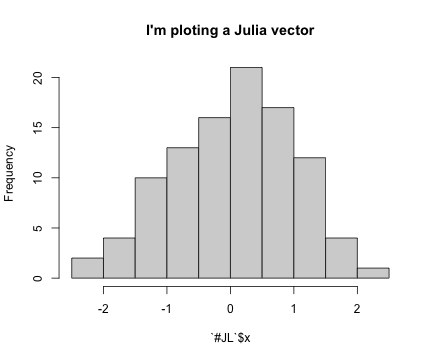

RObject{VecSxp}
$breaks
 [1] -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5

$counts
 [1]  2  4 10 13 16 21 17 12  4  1

$density
 [1] 0.04 0.08 0.20 0.26 0.32 0.42 0.34 0.24 0.08 0.02

$mids
 [1] -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25

$xname
[1] "`#JL`$x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [33]:
using RCall

x = randn(100)
R"""
hist($x, main = "I'm ploting a Julia vector")
"""

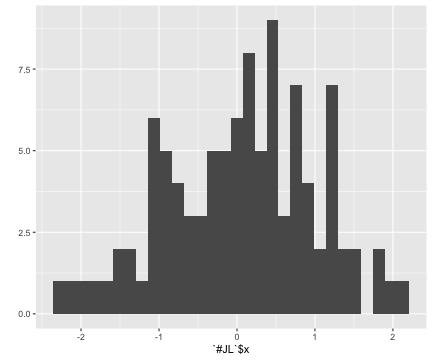

RObject{VecSxp}


┌ Warning: RCall.jl: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
└ @ RCall /Users/hongseung-gi/.julia/packages/RCall/iMDW2/src/io.jl:160


In [34]:
R"""
library(ggplot2)
qplot($x)
"""

In [35]:
x = R"""
rnorm(10)
"""

RObject{RealSxp}
 [1]  1.2492308 -1.7989555 -0.1898771 -1.1842120  0.4544445 -1.7194287
 [7] -0.2074463 -1.3635236 -1.6179601 -1.9416533


In [36]:
# collect R variable into Julia workspace
y = collect(x)

10-element Vector{Float64}:
  1.249230819067065
 -1.798955497575018
 -0.18987705083611223
 -1.1842119742710355
  0.454444457029997
 -1.719428690578273
 -0.20744631805068098
 -1.3635236317565913
 -1.6179601395355023
 -1.9416533428068243

* Access Julia variables in R REPL mode:
```julia
julia> x = rand(5) # Julia variable
R> y <- $x
```

* Pass Julia expression in R REPL mode:
```julia
R> y <- $(rand(5))
```

* Put Julia variable into R environment:
```julia
julia> @rput x
R> x
```

* Get R variable into Julia environment:
```julia
R> r <- 2
julia> @rget r
```

* If you want to call Julia within R, check out the [`XRjulia`](https://cran.r-project.org/web/packages/XRJulia/) package by John Chambers.

## Timing and benchmark

### Julia

`@time`, `@elapsed`, `@allocated` macros:

In [37]:
using Random  # standard library
Random.seed!(123) # seed
x = rand(1_000_000) # 1 million random numbers in [0, 1)

@time sum(x) # first run includes compilation time

  0.041924 seconds (72.43 k allocations: 4.228 MiB, 98.69% compilation time)


500060.34072352527

In [38]:
@time sum(x) # no compilation time after first run

  0.000570 seconds (1 allocation: 16 bytes)


500060.34072352527

In [39]:
# just the runtime
@elapsed sum(x)

0.000527286

In [40]:
# just the allocation
@allocated sum(x)

16

Use package `BenchmarkTools.jl` for more robust benchmarking. Analog of `microbenchmark` package in R.

In [41]:
using BenchmarkTools

bm = @benchmark sum($x) # '$' to avoid problems with globals

BenchmarkTools.Trial: 8446 samples with 1 evaluation.
 Range (min … max):  508.245 μs …  1.480 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     554.261 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   576.905 μs ± 66.304 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▅█▇▇▇▆▆▂▁                                                   
  ▁▆███████████▇▇▅▅▄▄▃▄▄▄▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁ ▃
  508 μs          Histogram: frequency by time          813 μs <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [42]:
using Statistics # standard library
benchmark_results = Dict() # a dictionary to store median runtime (in milliseconds)
benchmark_results["Julia bulitin"] = median(bm.times) / 1e6

0.554261

### C

We would use the low-level C code as the baseline for comparison. In Julia, we can easily run compiled C code using the `ccall` function. This is similar to `.C` in R.

In [43]:
using Libdl

C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file

# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -std=c99 -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [44]:
# make sure it gives same answer
c_sum(x)

500060.340723512

In [45]:
bm = @benchmark c_sum($x)

BenchmarkTools.Trial: 2985 samples with 1 evaluation.
 Range (min … max):  1.190 ms …  19.423 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.534 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.660 ms ± 578.512 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

       ▅█▆▆▅▂                                                  
  ▁▂▂▃▆███████▇▅▆▅▅▆▅▅▄▃▃▃▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  1.19 ms         Histogram: frequency by time        3.22 ms <

 Memory estimate: 0 bytes, allocs estimate: 0.

In [46]:
# store median runtime (in milliseconds)
benchmark_results["C"] = median(bm.times) / 1e6

1.533808

### R, builtin `sum`

Next we compare to the built in `sum` function in R, which is implemented using C.

In [47]:
using RCall

R"""
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum(y))
"""

RObject{VecSxp}
Unit: milliseconds
   expr     min       lq     mean   median       uq      max neval
 sum(y) 2.76354 3.083247 3.289608 3.250652 3.447672 5.076521   100


In [48]:
# store median runtime (in milliseconds)
@rget rbm # data.frame
benchmark_results["R builtin"] = median(rbm[!, :time]) / 1e6

3.250652

### R, handwritten loop

Handwritten loop in R is much slower.

In [49]:
using RCall

R"""
sum_r <- function(x) {
  s <- 0
  for (xi in x) {
    s <- s + xi
  }
  s
}
library(microbenchmark)
y <- $x
rbm <- microbenchmark(sum_r(y))
"""

RObject{VecSxp}
Unit: milliseconds
     expr      min       lq     mean   median      uq      max neval
 sum_r(y) 17.30945 21.80385 25.42109 24.29969 27.6817 69.35304   100


In [50]:
# store median runtime (in milliseconds)
@rget rbm # data.frame
benchmark_results["R loop"] = median(rbm[!, :time]) / 1e6

24.299692

### Python, bulitin `sum`

Bulit in funciton `sum` in Python.

In [51]:
using PyCall
PyCall.pyversion

v"3.9.5"

In [52]:
# get the Python built-in "sum" function:
pysum = pybuiltin("sum")
bm = @benchmark $pysum($x)

BenchmarkTools.Trial: 43 samples with 1 evaluation.
 Range (min … max):  100.431 ms … 170.892 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     115.804 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   118.432 ms ±  14.639 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

     ▁ ▁ ▁▄▁▁▁ █ ▁ ▁ ▁  ▁▁   ▁                                   
  ▆▆▆█▆█▆█████▁█▆█▆█▁█▆▆██▁▁▁█▁▁▁▁▁▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆▆ ▁
  100 ms           Histogram: frequency by time          171 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [53]:
# store median runtimes (in milliseconds)
benchmark_results["Python builtin"] = median(bm.times) / 1e6

115.803875

### Python, handwritten loop

In [54]:
using PyCall

py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

sum_py = py"py_sum"

bm = @benchmark $sum_py($x)

BenchmarkTools.Trial: 33 samples with 1 evaluation.
 Range (min … max):  125.883 ms … 231.412 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     145.815 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   153.977 ms ±  25.121 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

     ▃█  ▃█      ▃               █                               
  ▇▇▇██▇▇██▇▁▇▇▁▁█▇▁▇▁▇▇▇▁▇▇▁▁▁▁▁█▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▁▇▁▁▁▁▁▁▁▁▁▇ ▁
  126 ms           Histogram: frequency by time          231 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [55]:
# store median runtimes (in milliseconds)
benchmark_results["Python loop"] = median(bm.times) / 1e6

145.815444

### Python, numpy

Numpy is the high-performance scientific computing library for Python (mostly written in C).

In [56]:
# bring in sum function from Numpy
numpy_sum = pyimport("numpy")."sum"

PyObject <function sum at 0x7f93954758b0>

In [57]:
bm = @benchmark $numpy_sum($x)

BenchmarkTools.Trial: 7115 samples with 1 evaluation.
 Range (min … max):  488.807 μs …  21.072 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     610.472 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   686.738 μs ± 373.206 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

   ▁▆█▆▅▂▁▁                                                      
  ▄█████████▆▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂ ▃
  489 μs           Histogram: frequency by time          1.7 ms <

 Memory estimate: 336 bytes, allocs estimate: 6.

In [58]:
# store median runtimes (in milliseconds)
benchmark_results["Python numpy"] = median(bm.times) / 1e6

0.610472

Numpy performance is on a par with Julia bulit-in `sum` function. Both are about 3 times faster than C, probably because of insufficient optimization in compilation and overhead of passing Julia objects and receiving C pointers.

### Summary

In [59]:
benchmark_results

Dict{Any, Any} with 7 entries:
  "R builtin"      => 3.25065
  "Python builtin" => 115.804
  "C"              => 1.53381
  "Julia bulitin"  => 0.554261
  "Python loop"    => 145.815
  "Python numpy"   => 0.610472
  "R loop"         => 24.2997

* `C` and `R builtin` are the baseline C performance (gold standard)

* `Python builtin` and `Python loop` are 80-100 fold slower than C because the loop is interpreted.

* `R loop` is about 15 fold slower than C and indicates the performance of bytecode generated by its compiler package (turned on by default since R v3.4.0(Apr 2017)).

* `Julia builtin` and `Python numpy` are 2-3 fold faster than C.

## Acknowledgment

This lecture note has evolved from [Dr. Hua Zhou](http://hua-zhou.github.io)'s 2019 Winter Statistical Computing course notes available at <http://hua-zhou.github.io/teaching/biostatm280-2019spring/index.html>.